<a href="https://colab.research.google.com/github/pswaldia/ANONS/blob/master/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependancies

In [0]:
import torch
from torch import optim
from torch import nn
import matplotlib.pyplot as plt


In [0]:
import pandas as pd
import numpy as np


In [0]:
from torchvision import datasets,transforms

In [6]:
torch.manual_seed(7)
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,05.))])
trainset=datasets.CIFAR10('cifar/',train=True,transform=transform,download=True)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [8]:
torch.manual_seed(7)
testset=datasets.CIFAR10('cifarTest/',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [0]:

imageTest,labelTest=next(iter(testloader))


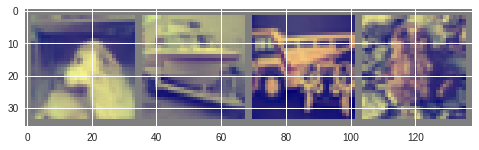

        dog        ship       truck        frog


In [72]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%11s' % classes[labels[j]] for j in range(4)))

In [84]:
for images,labels in trainloader:
  print(images.shape)
  break;

torch.Size([64, 3, 32, 32])


In [0]:
model3=nn.Sequential(nn.Linear(32*32*3,256),
                   nn.ReLU(),
                   nn.Linear(256,64), 
                   nn.ReLU(),
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1)
                   )
model2=nn.Sequential(nn.Linear(32*32*3,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1)
                    )

In [0]:
torch.save(model3.state_dict(), 'initial3.pth')
torch.save(model2.state_dict(), 'initial2.pth')

In [0]:


def train(lr,m):

  criterion=nn.NLLLoss()
  epochs=5
  optimizer=optim.SGD(model3.parameters(),lr=lr,momentum=m)
  accuracy_test=[]
  errorTrain=[]
  errorTest=[]
  print ("Learning rate:{} momentum:{}".format(lr,m))
  torch.manual_seed(7)
  for e in range(epochs):

      running_loss=0;
      validation_loss=0;
      accuracy=0;
      for images,labels in trainloader:
          optimizer.zero_grad()
          logits=model3(images.view(images.shape[0],-1))
          loss=criterion(logits,labels)
          loss.backward()
          optimizer.step()
          running_loss+=loss

      
      for imageTest,labelTest in testloader:
          with torch.no_grad():
              logits_test=model3(imageTest.view(imageTest.shape[0],-1))
          lossTest=criterion(logits_test,labelTest)
          validation_loss+=lossTest
          ps=torch.exp(logits)
          top_p,top_class=ps.topk(1,dim=1)
          equals=top_class==labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))

      else:
          print("Epoch: {}/{}.. ".format(e+1, epochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
                "Test Loss: {:.3f}.. ".format(validation_loss/len(testloader)),
                "Test Accuracy: {:.3f}".format((accuracy/len(testloader))*100))
          errorTest.append(validation_loss/len(testloader))
          errorTrain.append(running_loss/len(trainloader))
          accuracy_test.append((accuracy/len(testloader))*100)
          
          

  plt.plot([i for i in range(epochs)],errorTrain,label='Training loss')
  plt.plot([i for i in range(epochs)],errorTest,label='Validation loss')
  plt.legend()
  plt.title('Error vs epochs plot when learning rate={} and momentum={}'.format(lr,m))
  plt.xlabel('number of epochs')
  plt.ylabel('error')
  plt.savefig("model_3_"+str(lr)+"_"+str(m)+".png") 
  plt.show()
  plt.clf()




Learning rate:0.01 momentum:0.2
Epoch: 1/5..  Training Loss: 2.145..  Test Loss: 1.993..  Test Accuracy: 18.750
Epoch: 2/5..  Training Loss: 1.892..  Test Loss: 1.822..  Test Accuracy: 43.750
Epoch: 3/5..  Training Loss: 1.763..  Test Loss: 1.722..  Test Accuracy: 56.250
Epoch: 4/5..  Training Loss: 1.667..  Test Loss: 1.637..  Test Accuracy: 25.000
Epoch: 5/5..  Training Loss: 1.583..  Test Loss: 1.570..  Test Accuracy: 75.000


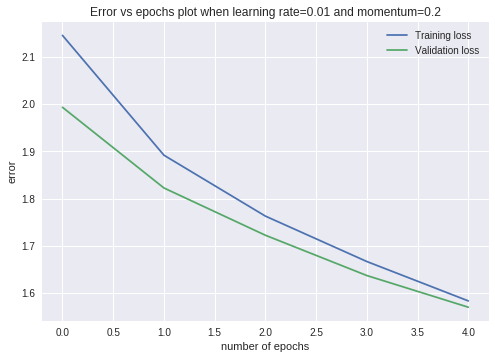

Learning rate:0.01 momentum:0.7
Epoch: 1/5..  Training Loss: 1.975..  Test Loss: 1.774..  Test Accuracy: 31.250
Epoch: 2/5..  Training Loss: 1.669..  Test Loss: 1.596..  Test Accuracy: 43.750
Epoch: 3/5..  Training Loss: 1.522..  Test Loss: 1.519..  Test Accuracy: 75.000
Epoch: 4/5..  Training Loss: 1.430..  Test Loss: 1.457..  Test Accuracy: 56.250
Epoch: 5/5..  Training Loss: 1.361..  Test Loss: 1.422..  Test Accuracy: 68.750


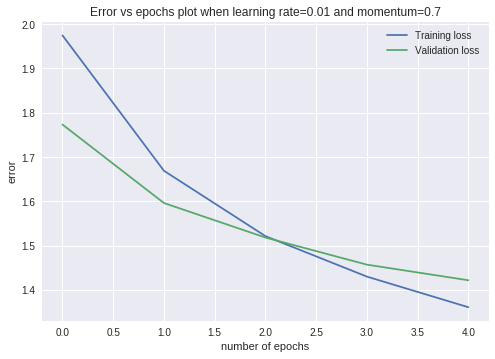

Learning rate:0.1 momentum:0.2
Epoch: 1/5..  Training Loss: 1.785..  Test Loss: 1.677..  Test Accuracy: 31.250
Epoch: 2/5..  Training Loss: 1.521..  Test Loss: 1.528..  Test Accuracy: 18.750
Epoch: 3/5..  Training Loss: 1.407..  Test Loss: 1.575..  Test Accuracy: 56.250
Epoch: 4/5..  Training Loss: 1.332..  Test Loss: 1.668..  Test Accuracy: 56.250
Epoch: 5/5..  Training Loss: 1.269..  Test Loss: 1.481..  Test Accuracy: 75.000


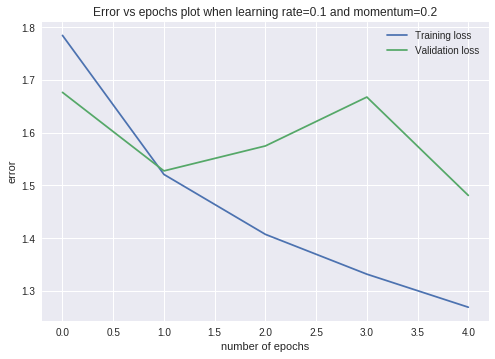

Learning rate:0.1 momentum:0.7
Epoch: 1/5..  Training Loss: 1.764..  Test Loss: 1.622..  Test Accuracy: 31.250
Epoch: 2/5..  Training Loss: 1.562..  Test Loss: 1.580..  Test Accuracy: 25.000
Epoch: 3/5..  Training Loss: 1.486..  Test Loss: 1.620..  Test Accuracy: 68.750
Epoch: 4/5..  Training Loss: 1.429..  Test Loss: 1.537..  Test Accuracy: 62.500
Epoch: 5/5..  Training Loss: 1.382..  Test Loss: 1.567..  Test Accuracy: 68.750


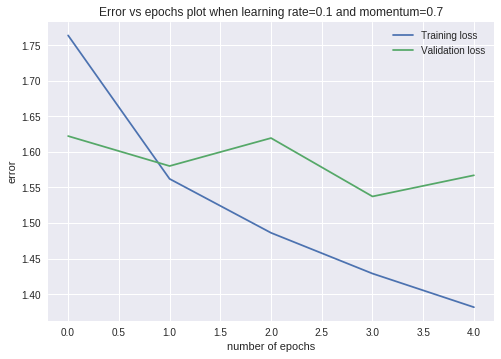

In [88]:
for a in [0.01,0.1]:
  for b in [0.2,0.7]:
    model3.load_state_dict(torch.load('initial3.pth'))
    train(a,b)

In [0]:


def train2(lr,m):

  criterion=nn.NLLLoss()
  epochs=5
  optimizer=optim.SGD(model2.parameters(),lr=lr,momentum=m)
  accuracy_test=[]
  errorTrain=[]
  errorTest=[]
  print ("Learning rate:{} momentum:{}".format(lr,m))
  torch.manual_seed(7)
  for e in range(epochs):

      running_loss=0;
      validation_loss=0;
      accuracy=0;
      for images,labels in trainloader:
          optimizer.zero_grad()
          logits=model2(images.view(images.shape[0],-1))
          loss=criterion(logits,labels)
          loss.backward()
          optimizer.step()
          running_loss+=loss

      
      for imageTest,labelTest in testloader:
          with torch.no_grad():
              logits_test=model2(imageTest.view(imageTest.shape[0],-1))
          lossTest=criterion(logits_test,labelTest)
          validation_loss+=lossTest
          ps=torch.exp(logits)
          top_p,top_class=ps.topk(1,dim=1)
          equals=top_class==labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))

      else:
          print("Epoch: {}/{}.. ".format(e+1, epochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
                "Test Loss: {:.3f}.. ".format(validation_loss/len(testloader)),
                "Test Accuracy: {:.3f}".format((accuracy/len(testloader))*100))
          errorTest.append(validation_loss/len(testloader))
          errorTrain.append(running_loss/len(trainloader))
          accuracy_test.append((accuracy/len(testloader))*100)
          
          

  plt.plot([i for i in range(epochs)],errorTrain,label='Training loss')
  plt.plot([i for i in range(epochs)],errorTest,label='Validation loss')
  plt.legend()
  plt.title('Error vs epochs plot when learning rate={} and momentum={}'.format(lr,m))
  plt.xlabel('number of epochs')
  plt.ylabel('error')
  plt.savefig("model__"+str(lr)+"_"+str(m)+".png") 
  plt.show()
  plt.clf()





Learning rate:0.01 momentum:0.2
Epoch: 1/5..  Training Loss: 2.006..  Test Loss: 1.882..  Test Accuracy: 25.000
Epoch: 2/5..  Training Loss: 1.821..  Test Loss: 1.778..  Test Accuracy: 37.500
Epoch: 3/5..  Training Loss: 1.729..  Test Loss: 1.708..  Test Accuracy: 56.250
Epoch: 4/5..  Training Loss: 1.661..  Test Loss: 1.648..  Test Accuracy: 25.000
Epoch: 5/5..  Training Loss: 1.606..  Test Loss: 1.611..  Test Accuracy: 68.750


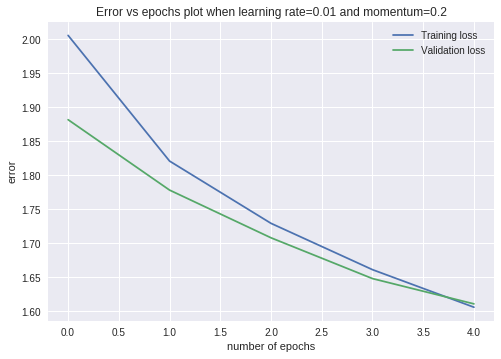

Learning rate:0.01 momentum:0.7
Epoch: 1/5..  Training Loss: 1.888..  Test Loss: 1.741..  Test Accuracy: 18.750
Epoch: 2/5..  Training Loss: 1.667..  Test Loss: 1.627..  Test Accuracy: 31.250
Epoch: 3/5..  Training Loss: 1.561..  Test Loss: 1.562..  Test Accuracy: 68.750
Epoch: 4/5..  Training Loss: 1.491..  Test Loss: 1.519..  Test Accuracy: 37.500
Epoch: 5/5..  Training Loss: 1.439..  Test Loss: 1.488..  Test Accuracy: 75.000


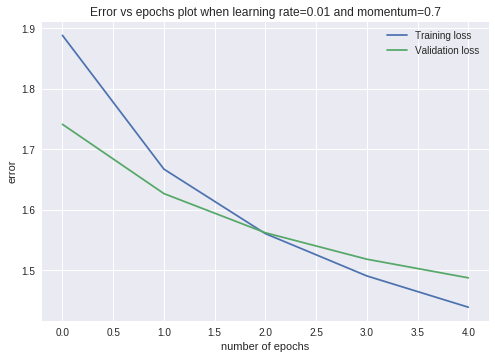

Learning rate:0.1 momentum:0.2
Epoch: 1/5..  Training Loss: 1.770..  Test Loss: 1.732..  Test Accuracy: 25.000
Epoch: 2/5..  Training Loss: 1.569..  Test Loss: 1.576..  Test Accuracy: 31.250
Epoch: 3/5..  Training Loss: 1.493..  Test Loss: 1.656..  Test Accuracy: 68.750
Epoch: 4/5..  Training Loss: 1.442..  Test Loss: 1.645..  Test Accuracy: 56.250
Epoch: 5/5..  Training Loss: 1.402..  Test Loss: 1.547..  Test Accuracy: 75.000


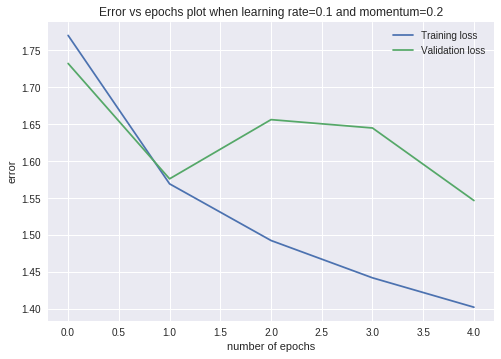

Learning rate:0.1 momentum:0.7
Epoch: 1/5..  Training Loss: 1.815..  Test Loss: 1.718..  Test Accuracy: 25.000
Epoch: 2/5..  Training Loss: 1.665..  Test Loss: 1.657..  Test Accuracy: 43.750
Epoch: 3/5..  Training Loss: 1.605..  Test Loss: 1.811..  Test Accuracy: 68.750
Epoch: 4/5..  Training Loss: 1.567..  Test Loss: 1.769..  Test Accuracy: 56.250
Epoch: 5/5..  Training Loss: 1.532..  Test Loss: 1.660..  Test Accuracy: 62.500


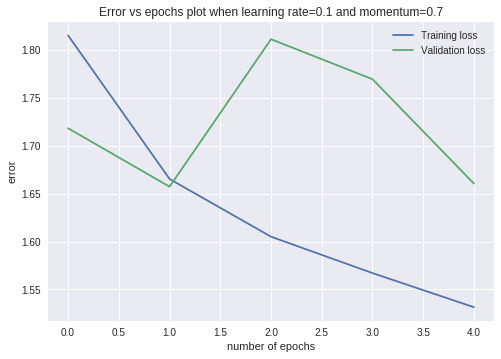

In [136]:
for a in [0.01,0.1]:
  for b in [0.2,0.7]:
    model2.load_state_dict(torch.load('initial2.pth'))
    train2(a,b)